In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
%matplotlib inline

Lets look at the [homicide data from the CPRC](https://crimeresearch.org/2014/03/comparing-murder-rates-across-countries/).

I also went to the [UN stats website](https://unstats.un.org/unsd/snaama/selbasicFast.asp) and got data for the *per capita* GDP for these countries in the same year. I'll explain the significance of these data later.

Here's the data. Homicide and suicide rates are per 100,000 people, while gun ownership is per 100 people.

In [3]:
CPRC_data = 'CPRC_homicide_data.txt'
df = pd.read_csv(CPRC_data, sep='\t', index_col=0)

print df
print df.describe()

                 HomicideRate  GunOwnershipRate      pcGDP
Australia                0.80              15.0   68227.60
Austria                  0.50              30.4   50933.03
Belgium                  1.20              17.2   47887.29
Brazil                  25.50               8.0   13038.90
Canada                   1.70              30.8   51844.98
Chile                    5.20              10.7   14582.17
Czech Republic           0.80              16.3   21639.33
Denmark                  0.80              12.0   61687.16
Estonia                  4.70               9.2   17446.54
Finland                  1.80              45.3   50719.71
France                   0.80              31.2   43762.48
Germany                  0.50              30.3   46723.21
Greece                   1.40              22.5   25804.41
Hungary                  1.50               5.5   14024.80
Iceland                  1.30              30.3   45711.15
Ireland                  1.30               8.6   51709.

/home/christopher/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


First off, the CPRC uses the data for 2011, while the analysis was done in 2014, which is very suspicious, since in 2011 Norway suffered the deadliest attack since WWII, and the fifth deadliest in Western Europe. Gun advocates like to cherry pick Norway in 2011 because of [this particularly bloody event](https://en.wikipedia.org/wiki/2011_Norway_attacks) in a country that is typically upheld as a model liberal socialized country.

As you can see, this single event more than doubled this small countries usual homicide rate. This data is from the [UNODC](https://data.unodc.org/), and I'll use it more later. There is no reason why the CPRC couldn't look across multiple years, rather than cherry picking 2011.

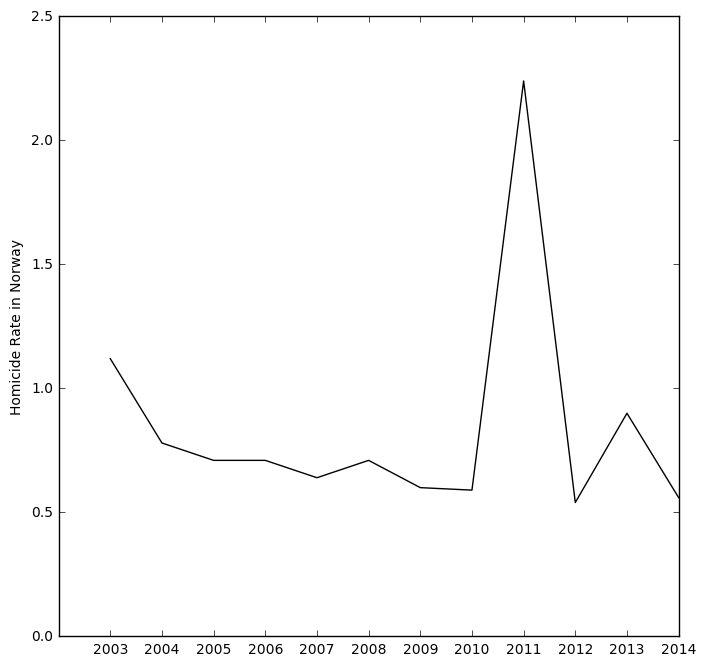

In [4]:
UNODC_rates = 'UNODC_homicide_rates_per_100k.txt'
UNODC = pd.read_csv(UNODC_rates, sep='\t', index_col=0)

nor = UNODC.loc[UNODC.index == 'Norway'].transpose()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(nor, '-k')
ax.set_ylabel('Homicide Rate in Norway')
ax.set_ylim(0, 2.5)
ticks = ax.set_xticks(range(2003, 2015))

Still, I think we can learn something from this data.

Lets recreate their plot of gun ownership v. homicide (but lets use a log scale, because we aren't amatuers).

Homicide rate = -0.0207162271172 * Gun Ownership Rate + 3.49444870065
r=-0.0612192414393, p=0.722825429989


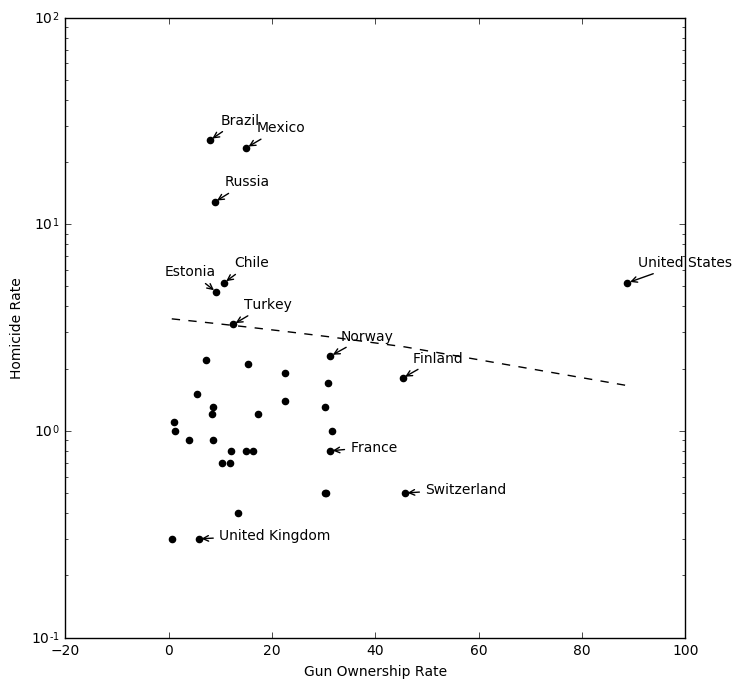

In [5]:
df = df.sort_values(by='GunOwnershipRate')
x = df.GunOwnershipRate
y = df.HomicideRate

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.scatter(x, y,
           color='k', marker='o')
ax.set_ylabel('Homicide Rate')
ax.set_xlabel('Gun Ownership Rate')

# Add some select labels
def labeler(ax, df, labeled, offset):
    for i, label in enumerate(df.index):
        if label in labeled:
            ax.annotate(label,
                        xy=(x[i], y[i]),
                        xytext=(x[i]+offset[0], y[i]*(1+offset[1]/10.)),
                        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labeler(ax, df, ['United States', 'Finland', 'Turkey', 'Brazil', 'Mexico', 'Russia', 'Chile', 'Norway'], (2,2))
labeler(ax, df, ['France', 'United Kingdom', 'Switzerland'], (4, 0))
labeler(ax, df, ['Estonia'], (-10, 2))

# Add a linear regression
fit = stats.linregress(x, y)
reg = fit[0]*x+fit[1]
ax.plot(x, reg, '--k')

print 'Homicide rate = {} * Gun Ownership Rate + {}\nr={}, p={}'.format(*fit)


Okay, so it does seem from this data that homicide and gun ownership are negatively correlated. However, that result is not significant, and the r value is very low, meaning that the explanatory power of gun ownership for these data on homicide is very poor. Clearly, something besides gun ownership is the dominant driver of homicide for these countries.

Looking at the data, there are a few countries with homicide rates that are WAY higher than the others. Mexico, Brazil, and Russia, especially. The US falls into this upper echelon that include Turkey, Chile, and Estonia as well.

It strikes me as odd that the US would look more like Russia or Chile in homicide, since these aren't countries I typically think of as being in a similar situation as the US. These are all 2nd or 3rd world countries.

Since Brazil, Mexico, and Russia are so far outside the norm, we might have justification to throw them out as outliers. But I don't like to do that unless we can figure some reason they might be incomparable.

This brings me to the UN *per capita* GDP data. Lets take a look at that v. homicide:

Homicide rate = nan * per capita GDP + nan
r=nan, p=nan


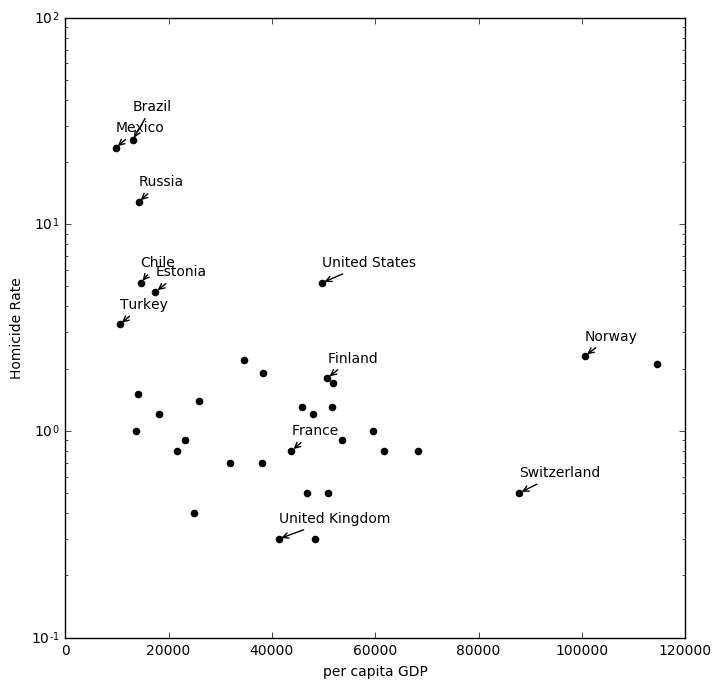

In [6]:
df = df.sort_values(by='pcGDP')
x = df.pcGDP
y = df.HomicideRate

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.scatter(x, y,
           color='k', marker='o')
ax.set_ylabel('Homicide Rate')
ax.set_xlabel('per capita GDP')

labeler(ax, df, ['United States', 'United Kingdom', 'Switzerland', 'France', 'Finland',
                 'Turkey', 'Mexico', 'Russia', 'Chile', 'Norway', 'Estonia'], (2,2))
labeler(ax, df, ['Brazil'], (2, 4))

fit = stats.linregress(x, y)
reg = fit[0]*x+fit[1]
ax.plot(x, reg, '--k')

print 'Homicide rate = {} * per capita GDP + {}\nr={}, p={}'.format(*fit)

Whoa! The wealth of the country seems to have a strong effect on homicide rate! 37% of the variation in homicide rate can be explained by wealth, and that is significant below the 5% error threshold. Looking at the trend, though, the relationship doesn't seem linear at all. All of the super-high homocide countries had a *per capita* GDP of less than $20,000 in 2011. It looks like these poor countries are sometimes normal in homocide, but sometimes can become destabilized and have very high homicide rates.

In any case, poor countries seem to be playing by different rules than the relatively wealthy countries. This confounding effect, combined with homicide rates that are two standard deviations greater than the mean, is pretty good justification to call these points outliers within this data set. For consistency, though, lets toss all the poor countries, including those that aren't super bloody but might still be very different than wealthy countries, and only consider those countries that earn more than $20k per capita.

Homicide rate = 0.0374608821447 * Gun Ownership Rate + 0.396412157417
r=0.679207027946, p=0.00013597305497


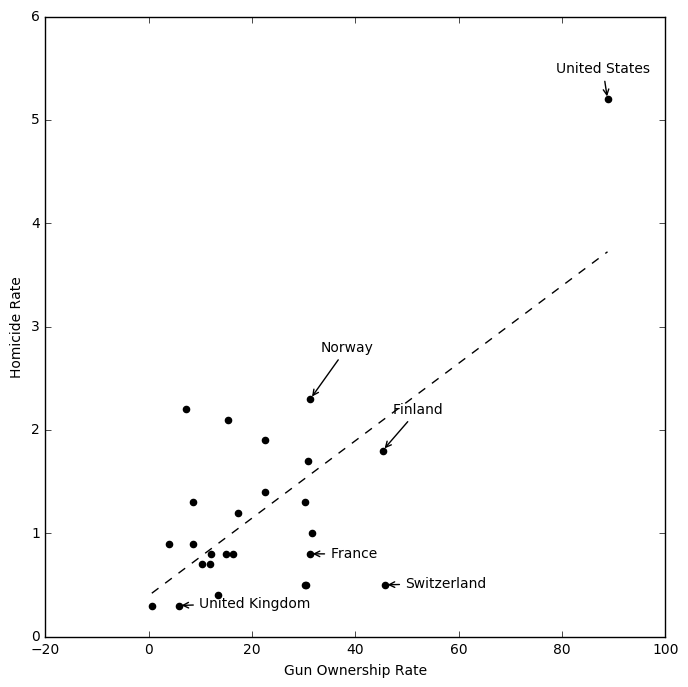

In [7]:
df = df.sort_values(by='GunOwnershipRate')
# Filter out poor countries
df = df.loc[df.pcGDP >= 20000]
x = df.GunOwnershipRate
y = df.HomicideRate

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(x, y,
           color='k', marker='o')
ax.set_ylabel('Homicide Rate')
ax.set_xlabel('Gun Ownership Rate')

labeler(ax, df, ['Finland', 'Turkey', 'Brazil', 'Mexico', 'Russia', 'Chile', 'Norway'], (2,2))
labeler(ax, df, ['France', 'United Kingdom', 'Switzerland'], (4, -.5))
labeler(ax, df, ['United States'], (-10, .5))

fit = stats.linregress(x, y)
reg = fit[0]*x+fit[1]
ax.plot(x, reg, '--k')

print 'Homicide rate = {} * Gun Ownership Rate + {}\nr={}, p={}'.format(*fit)

Now we can see a strong linear relationship between gun ownership and homicide among wealthy countries. Notice that I removed the log scale. Even with this cherry-picked dataset that includes Norway in 2011 specifically, gun ownership explains a whopping 68% of homicide, and that is highly significant. Within this data set, the US is the clear outlier, with over twice the homicide rate of any other country.

It is true that other developed countries do not suffer as much from gun violence as the US does, and that is largely because they simply don't have as many guns. 

### Suicide

I also want to note that [more than half of gun deaths in the US are suicides](http://www.annualreviews.org/doi/10.1146/annurev-publhealth-031914-122535), so we are only looking at a fraction of the potential harm that guns can cause when we only consider homicide. There are very good data in the US that [owning at least one firearm significantly increases your chance of suicide](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4984734/).